In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# `EDA`

In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


# `Renaming the columns`

In [8]:
fraud.rename({'Marital.Status':'Marital Status','Taxable.Income':'Taxable Income','City.Population':'Population','Work.Experience':'Work Exp'},axis=1,inplace=True)

In [9]:
fraud

,Undergrad,Marital Status,Taxable Income,Population,Work Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# `Applying the given Condition`

In [10]:
z=np.empty(600, dtype=object)
i=0

for value in fraud['Taxable Income']:
    if value<=30000:
        z[i]='Risky'
    else:
        z[i]='Good'
    i=i+1    

In [11]:
target=pd.DataFrame(z,columns=['Target'])

# `Combining 2 Columns`

In [12]:
fraud=pd.concat([fraud,target],axis=1)

# `Label Encoding`

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
fraud['Undergrad']= le.fit_transform(fraud['Undergrad'])
fraud['Marital Status']= le.fit_transform(fraud['Marital Status'])
fraud['Urban']= le.fit_transform(fraud['Urban'])
fraud['Target']= le.fit_transform(fraud['Target'])

In [16]:
fraud

,Undergrad,Marital Status,Taxable Income,Population,Work Exp,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


# `Visulazations`

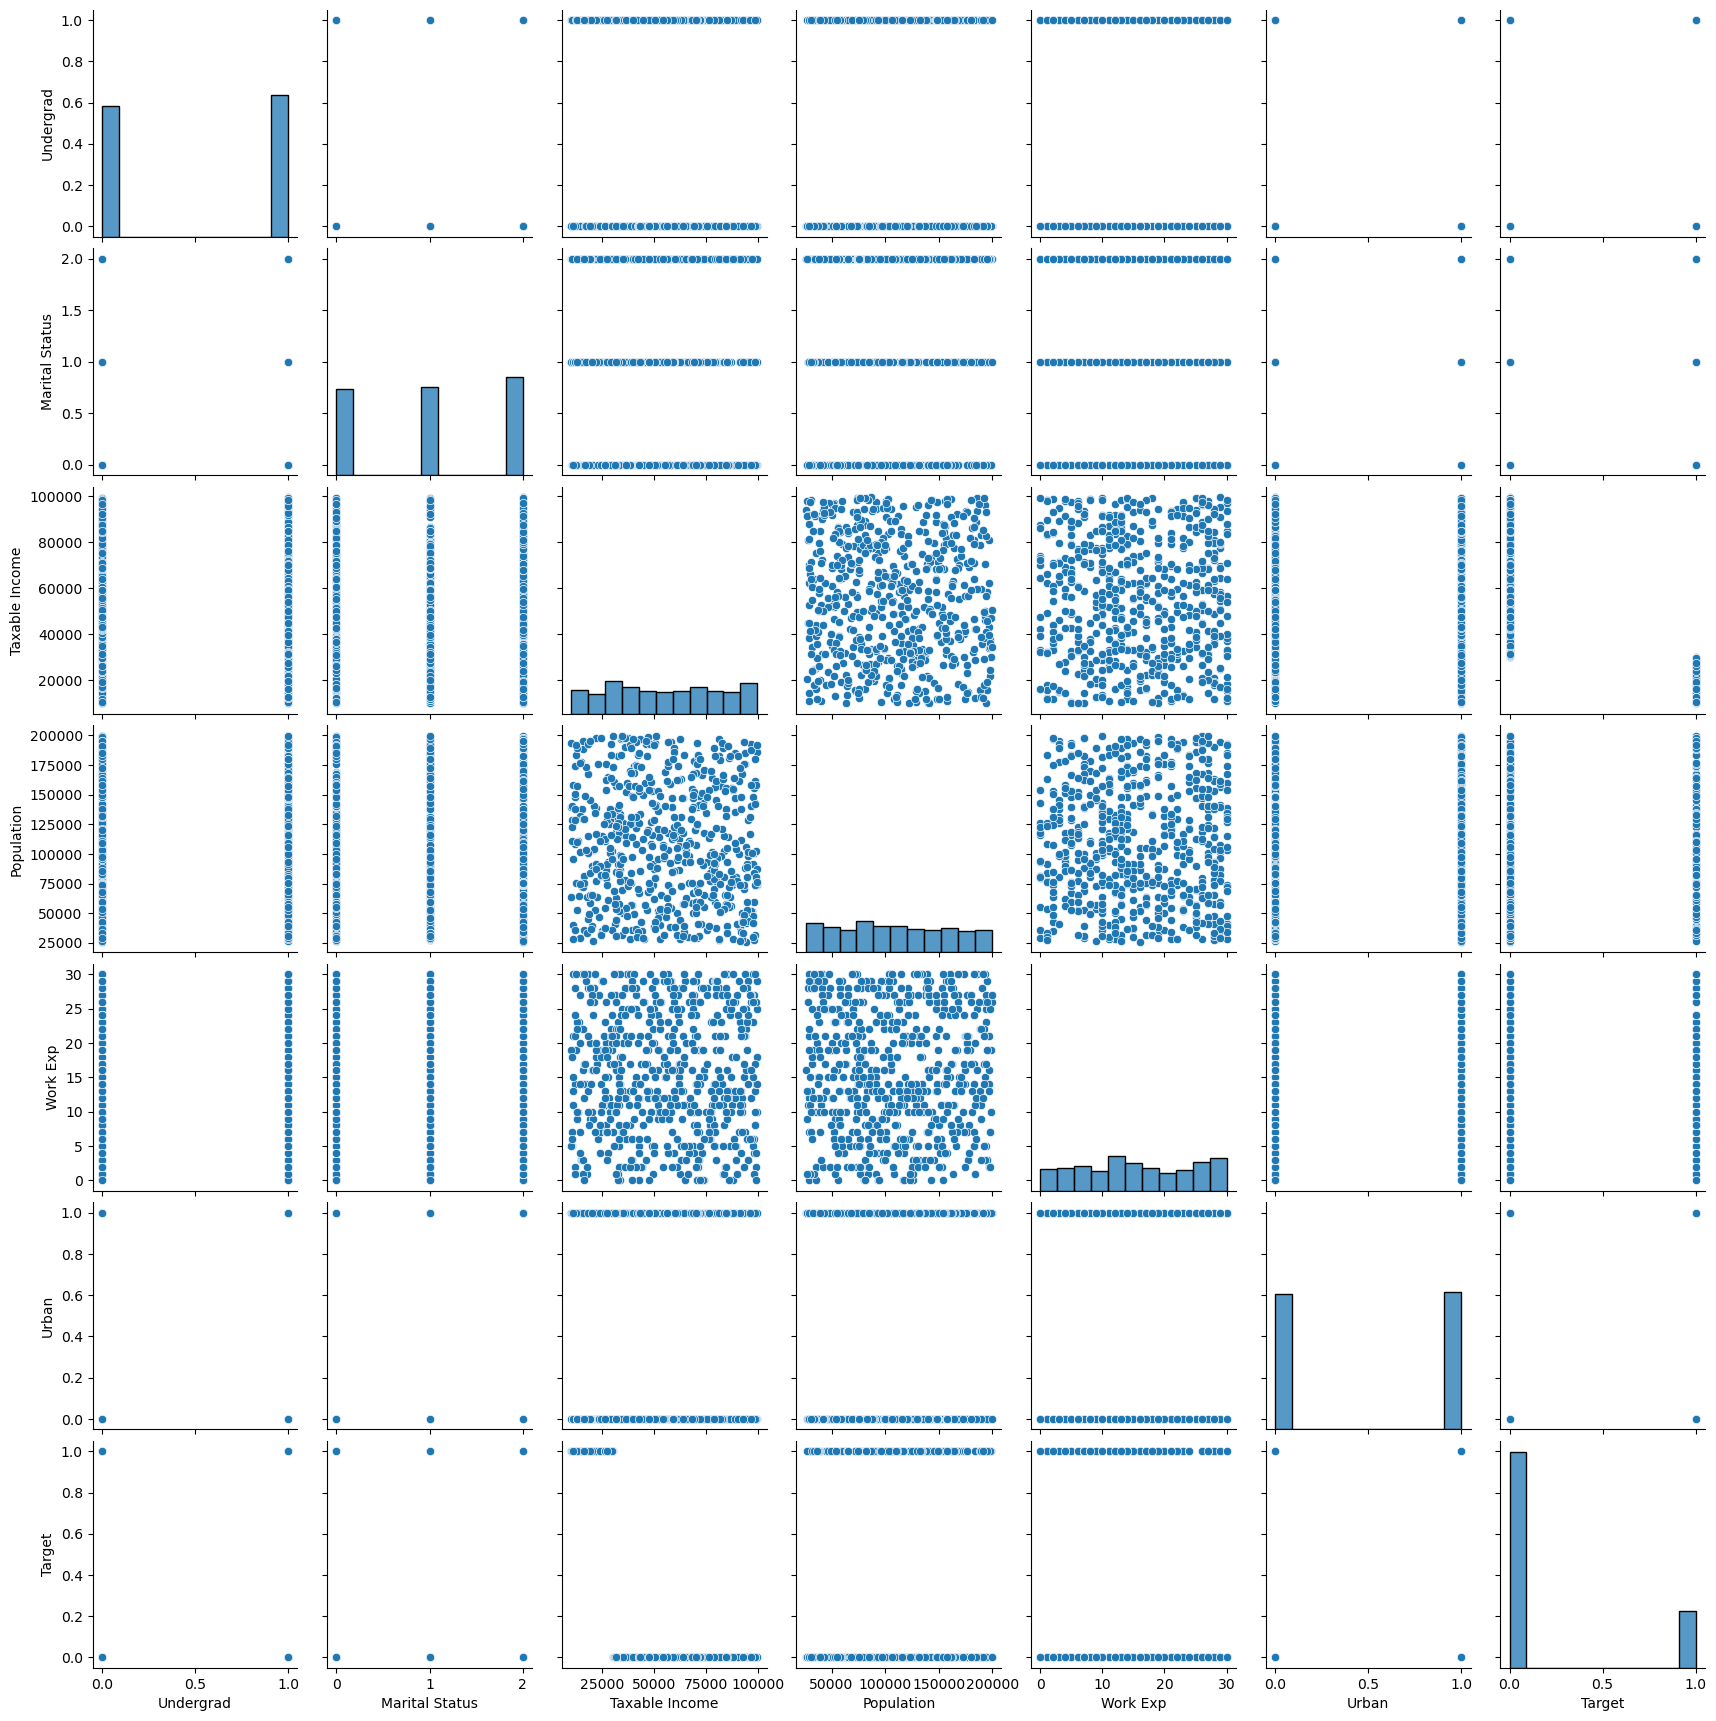

In [17]:
sns.pairplot(data=fraud)

# `Insights`
None of the features is normally distributed.

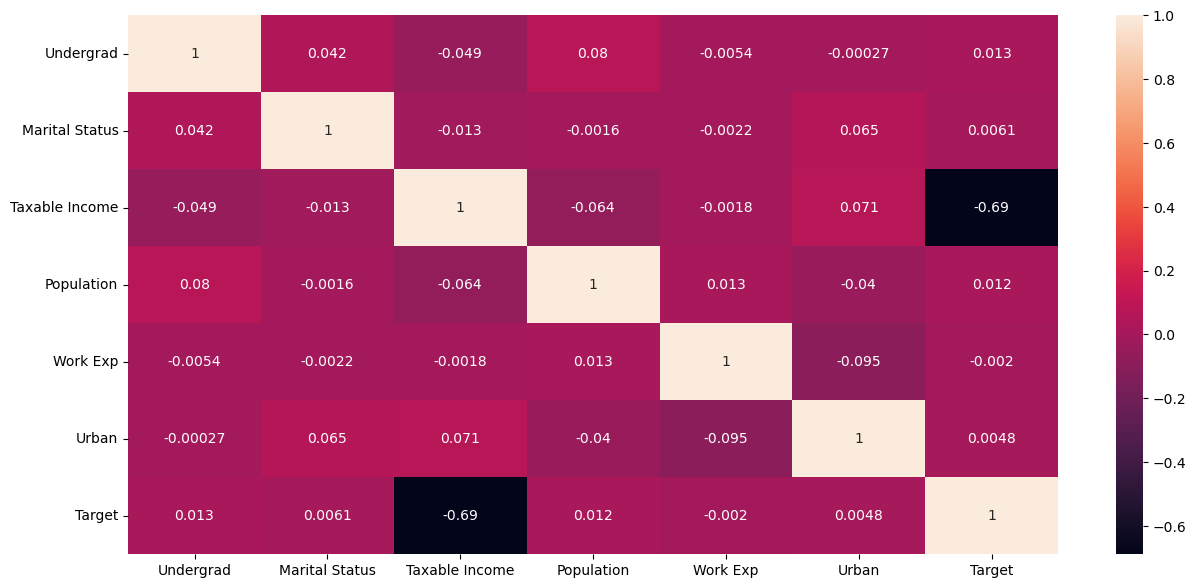

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(fraud.corr(),annot=True)
plt.show()

# `Insights`
Taxable Income and Target are negatively correlated

<Axes: xlabel='Taxable Income'>

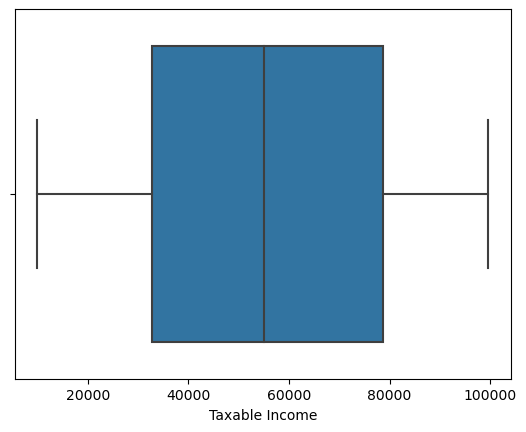

In [25]:
sns.boxplot(data=fraud,x='Taxable Income')

<Axes: xlabel='Work Exp'>

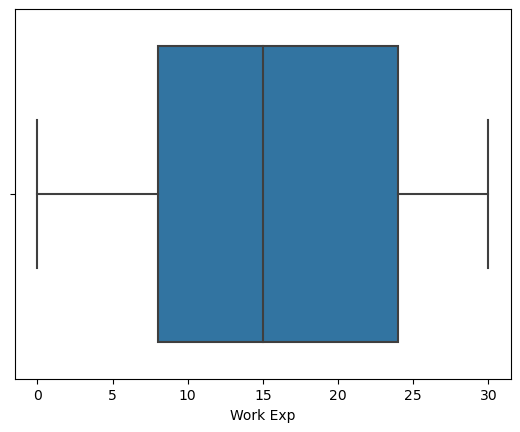

In [28]:
sns.boxplot(data=fraud,x='Work Exp')

<Axes: xlabel='Population'>

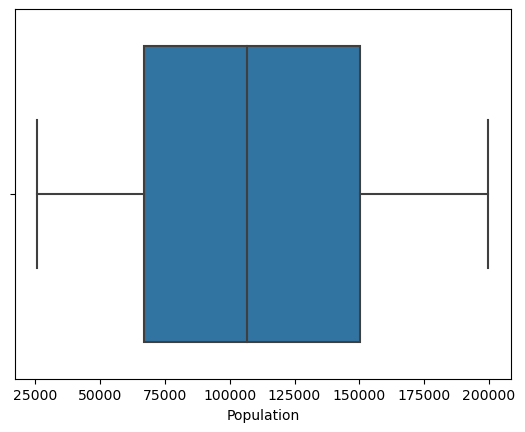

In [29]:
sns.boxplot(data=fraud,x='Population')

# `Insights`
Work.Experience has a mean that is much inferior to the other constituents as we already saw in the previous section.

# `Importing Random Forest`

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [20]:
x=fraud.drop('Target',axis=1)
y=fraud.Target

In [21]:
kfold = KFold(n_splits=7, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=65, max_features=7)

In [22]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9983193277310924
